<a href="https://www.kaggle.com/code/ryanrtky/in-depth-analysis-of-school-shootings-in-the-us?scriptVersionId=139001731" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.DataFrame(pd.read_csv('/kaggle/input/gunvdataset/schoolshooting_dataset.csv'))
df.head()

,LONCOD,LATCOD,CDCODE,year,school,city,state,address,urbanrural,race,killed,injured,victims,date,type,NCESSCH,time
0,-75.584900,39.668100,1000.0,2009,William Penn High School,New Castle,Delaware,713 E Basin Rd,suburbtown,BLACK,0,1,1,8-Jan-09,High School,1.000230e+11,8:30PM
1,-87.617500,41.839900,1701.0,2009,Dunbar Vocational Career Academy,Chicago,Illinois,3000 S King Dr,urban,BLACK,0,5,5,9-Jan-09,High School,1.709930e+11,8:00PM
2,-90.165100,38.565700,1712.0,2009,Cahokia High School,Cahokia,Illinois,800 Range Ln,suburbtown,BLACK,1,0,1,23-Jan-09,High School,1.708040e+11,7:20PM
3,-78.311800,35.831500,3713.0,2009,Zebulon Middle School,Zebulon,North Carolina,Halifax Road and New Oak Street,suburbtown,BLACK,0,1,1,11-Feb-09,Middle School,3.704720e+11,6:00AM
4,-83.113977,42.383593,NaN,2009,Central High School,Detroit,Michigan,2425 Tuxedo St,urban,NaN,0,1,1,17-Feb-09,High School,2.601103e+11,2:20PM


In [3]:
x = df['year'].unique()
y = df['year'].value_counts()
y = y.sort_index()
print(x)
print(y)

[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
2009    13
2010     8
2011    12
2012     7
2013    12
2014    20
2015    17
2016    35
2017    27
2018    29
Name: year, dtype: int64


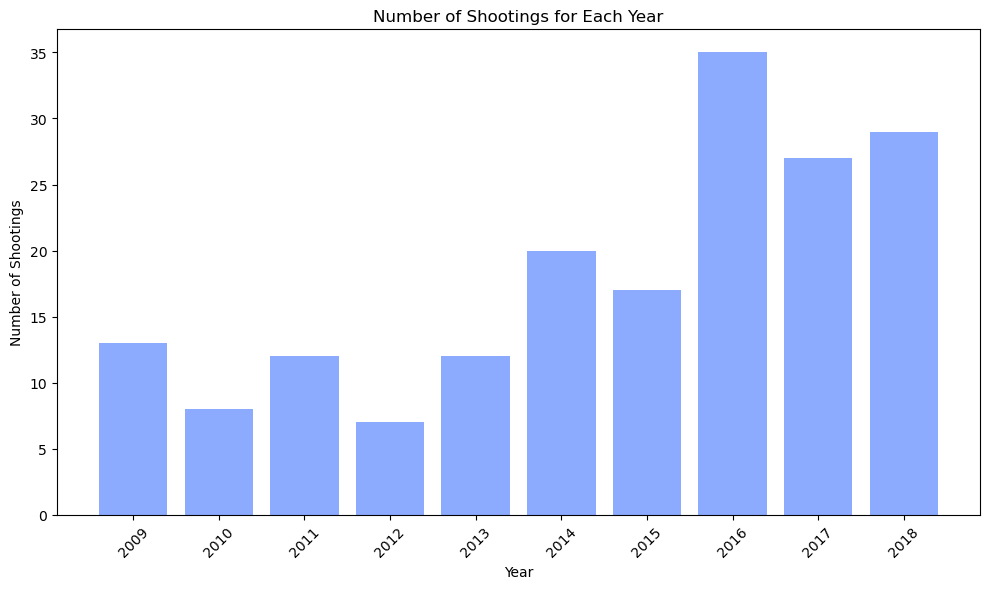

In [4]:
# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='#8CABFF')
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.title('Number of Shootings for Each Year')
plt.xticks(x,rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

0.8296583399570173
t-statistic: -4.421145926439941
p-value: 0.0022230921831557534


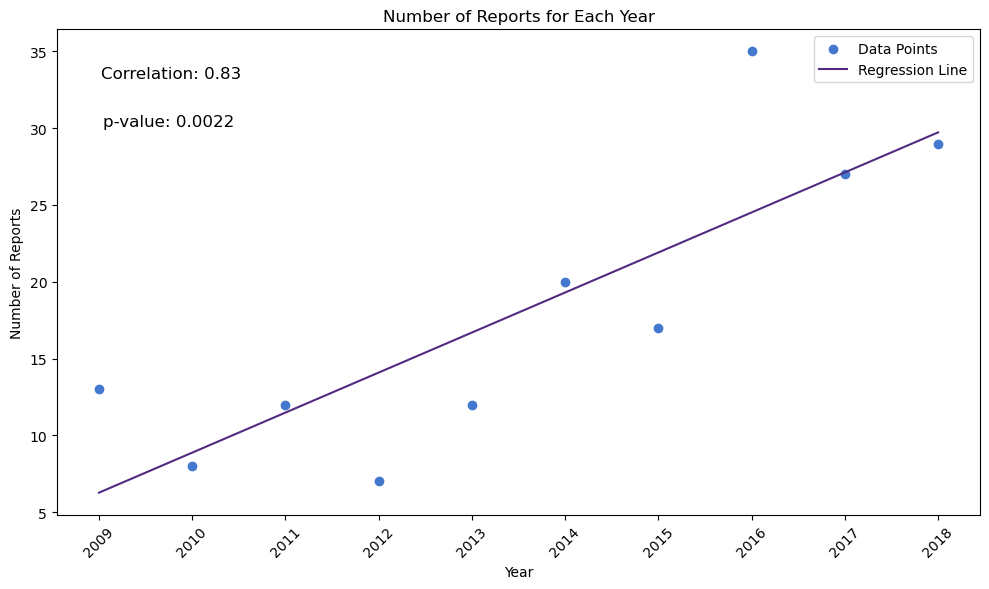

In [5]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='#4477CE', label='Data Points')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.title('Number of Reports for Each Year')

# Perform linear regression
slope, intercept = np.polyfit(x, y, 1)
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='#512B81', label='Regression Line')

plt.xticks(x, rotation=45)
plt.legend()

# Check correlation
correlation = np.corrcoef(x, y)[0, 1]
print(correlation)
plt.text(0.2, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black', ha='right')

# t-test
early_years = y[y.index < 2014]
recent_years = y[y.index >= 2014]
t_statistic, p_value = stats.ttest_ind(early_years, recent_years)
plt.text(0.05, 0.8, f'p-value: {p_value:.4f}', transform=plt.gca().transAxes, fontsize=12, color='black', ha='left')
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Display the plot
plt.tight_layout()
plt.show()


**Hypothesis:**
Null Hypothesis (H0): There is no significant relationship between the year and the number of reports of school shootings in the US.
Alternative Hypothesis (Ha): There is a significant relationship between the year and the number of reports of school shootings in the US.

**Conclusion:**
Based on the analysis performed on the dataset of school shooting reports in the US, we can draw the following conclusions:

The t-test results yielded a t-statistic of -4.42 and a p-value of 0.0022. Since the p-value is less than the commonly used significance level of 0.05, we reject the null hypothesis. This suggests that there is a statistically significant relationship between the year and the number of reports of school shootings.

Furthermore, the observed negative t-statistic indicates that as the years increase, the number of shootings tends to increase. The negative sign of the t-statistic aligns with our initial hypothesis that there is a positive relationship between the two variables.

It is important to note that while the t-test results provide evidence of a significant relationship, it does not establish causation. Other factors beyond the scope of this analysis may contribute to the observed trend in school shooting reports over the years.

In conclusion, the analysis supports the hypothesis that there is a significant relationship between the year and the number of reports of school shootings in the US. This finding underscores the importance of continued research and efforts to understand and address the complex factors that influence school shooting incidents.

**Analysis of injuries, fatalities and total victims over time related to school shootings**

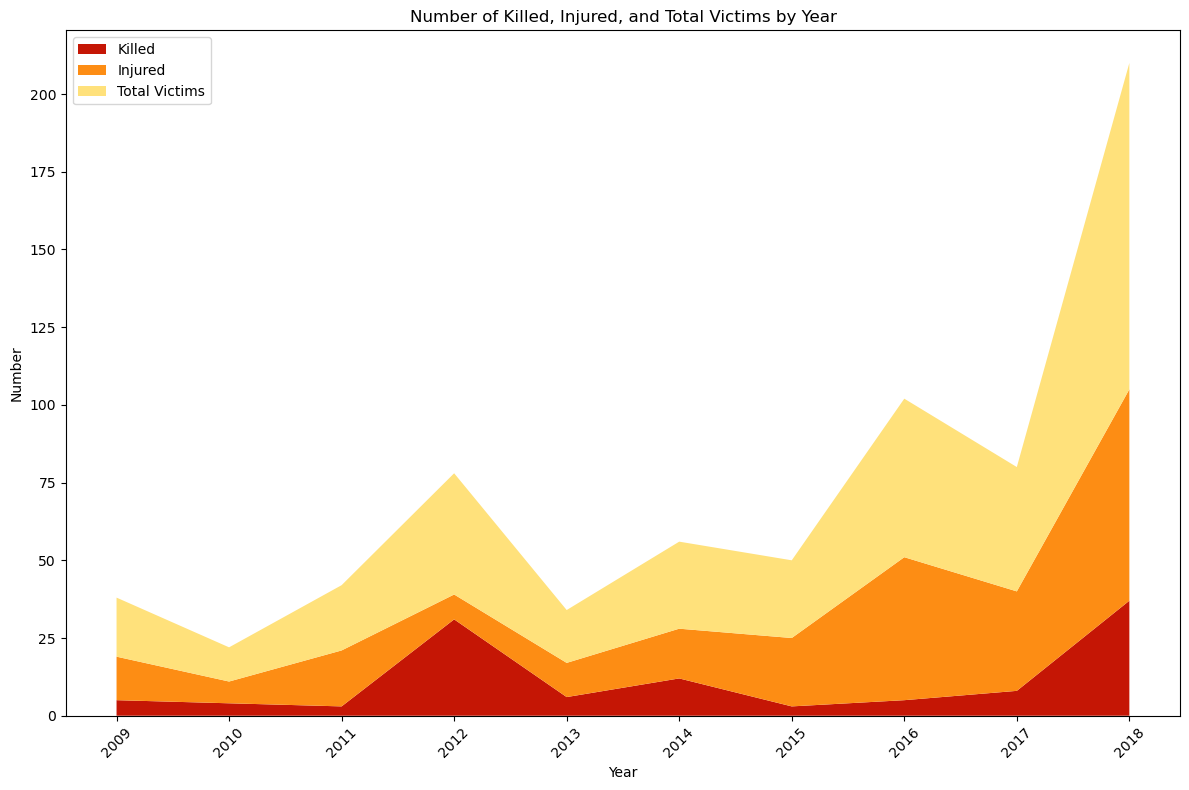

In [6]:
data = df.groupby('year')[['killed', 'injured', 'victims']].sum()

# Stack plot
plt.figure(figsize=(12, 8))
plt.stackplot(data.index, data['killed'], data['injured'], data['victims'], labels=['Killed', 'Injured', 'Total Victims'], colors=['#C51605', '#FD8D14', '#FFE17B'])
plt.title('Number of Killed, Injured, and Total Victims by Year')
plt.xlabel('Year')
plt.ylabel('Number')
plt.legend(loc='upper left')
plt.xticks(df['year'].unique(), rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

**Analysis Of Gun Violence Data from 2014 - 2017**

In [7]:
# Load new dataset and change date to only have year + rename to year
gvdata = pd.read_csv('/kaggle/input/gunvdataset/gunviolencedataVictims.csv')
gvdata['date'] = gvdata['date'].str[:4]
gvdata.rename(columns={'date': 'year'}, inplace=True)

In [8]:
# Output sum of victims for each year
victimTotal = gvdata.groupby('year')['n_victims'].sum()
print("Sum of victims by", victimTotal)


Sum of victims by year
2013     1296
2014    35559
2015    40451
2016    45646
2017    46214
2018     9704
Name: n_victims, dtype: int64


In [9]:
# Since there are discrepancies in data (2013 and 2018) only 2014 - 2017 can be used
# To get the percentage of deaths due to school shootings from total victims:
filtered_df = gvdata[~gvdata['year'].isin(['2013','2018'])]
filtered_df.head() 

,incident_id,year,n_killed,n_injured,n_victims
278,95289,2014,0,0,0
279,92401,2014,0,0,0
280,92383,2014,1,0,1
281,92142,2014,0,1,1
282,95261,2014,0,1,1


In [10]:
# Get the sum of total gun violence victims
sumTotal = gvdata['n_killed'].sum()
print(sumTotal)

60468


In [11]:
# Remove unneeded years
filtered_data_shootings = df[~df['year'].isin([2009,2010,2011,2012,2013,2018])]
filtered_data_shootings.tail()

,LONCOD,LATCOD,CDCODE,year,school,city,state,address,urbanrural,race,killed,injured,victims,date,type,NCESSCH,time
146,-122.398455,40.015716,601.0,2017,Rancho Tehama Elementary School,Corning,California,17357 Stagecoach Rd,rural,HISP,0,1,1,14-Nov-17,Elementary School,6.097800e+10,8:00AM
147,-107.990243,36.820718,3503.0,2017,Aztec High School,Aztec,New Mexico,500 E Chaco St,suburbtown,WHITE,2,0,2,7-Dec-17,High School,3.500150e+11,8:04AM
148,-88.252835,40.116662,1713.0,2017,Champaign Central High School,Champaign,Illinois,610 W University Ave,urban,WHITE,0,3,3,8-Dec-17,High School,1.709420e+11,9:20PM
149,-119.658392,36.318740,621.0,2017,Roosevelt Elementary,Hanford,California,870 Davis St,urban,HISP,0,1,1,11-Dec-17,Elementary School,6.164700e+10,3:30PM
150,-83.715607,43.098421,2605.0,2017,Beecher High School,Mount Morris,Michigan,6255 Neff Rd,suburbtown,NaN,0,1,1,19-Dec-17,High School,2.604500e+11,9:15PM


In [12]:
# Percent killed
sumTotal = gvdata['n_killed'].sum()
sumSS = filtered_data_shootings['killed'].sum()
print("Percentage of school shootings to gun related deaths from 2014 to 2017:", (sumSS/sumTotal)*100, "%")
# Percent injured
sumTotal = gvdata['n_injured'].sum()
sumSS = filtered_data_shootings['injured'].sum()
print("Percentage of school shootings to gun related injuries from 2014 to 2017:", (sumSS/sumTotal)*100, "%")
# Percent victims
sumTotal = gvdata['n_victims'].sum()
sumSS = filtered_data_shootings['victims'].sum()
print("Percentage of school shootings to gun related victims from 2014 to 2017:", (sumSS/sumTotal)*100, "%")


Percentage of school shootings to gun related deaths from 2014 to 2017: 0.046305483892306674 %
Percentage of school shootings to gun related injuries from 2014 to 2017: 0.09797131805205993 %
Percentage of school shootings to gun related victims from 2014 to 2017: 0.08050539497959411 %


**TLDR:**

- An evident rise in the incidence of school shootings corresponds with the passage of time, suggesting a notable shift in this disturbing phenomenon.

- The total number of victims, encompassing both fatalities and injuries resulting from school shootings, exhibits a clear upward trajectory. This observation underscores the concerning impact of such incidents on human lives.

During the period from 2014 to 2017, a comprehensive analysis revealed significant trends and correlations between school shootings and gun-related outcomes:

- The proportion of gun-related fatalities attributed to school shootings was found to be a modest 0.046%. This evaluation, which accounts for all affected victims, provides a nuanced understanding of the relative impact of school shootings within the realm of gun-related deaths.

- A calculated ratio of 0.098% indicates the relative occurrence of injuries in school shootings compared to overall gun-related fatalities. This metric sheds light on the specific pattern of injuries associated with these incidents.

- Total victims resulting from school shootings contribute to approximately 0.081% of the broader landscape of gun-related fatalities. This insight emphasizes the unique nature of injuries within the context of these events.

**** These observations are exclusively grounded in the data harnessed from the analyzed datasets.*